In [ ]:
from google.colab import drive

import os
import shutil
import random

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import layers
from tensorflow.keras import models

from tensorflow.keras import optimizers

from tensorflow.keras import callbacks

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
#from tensorflow.keras.models import load_model # !!!!!!!!!!!! import models already

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from tensorflow.keras import Input
from tensorflow.keras import Model

from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2


## Mounting the google drive

In [3]:
# from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
source_zip      = '/content/drive/MyDrive/google colab/Data_simple_lung_cancer.zip'
destination_dir = '/content'

copy_zip_file(source_zip, destination_dir)


Zip file '/content/drive/MyDrive/google colab/Data_simple_lung_cancer.zip' copied to '/content' successfully.


### Unzipping the Data

In [ ]:
!unzip \*.zip && rm *.zip


### Creating relevant directories & transferring the data

train (folder is empty)

In [10]:
# import os, shutil

# creating a directory where all of the images from all classes, will be initially transferred
original_dataset_dir  =  '/content/train/'
os.mkdir(original_dataset_dir)


train (all of the data is now in this folder)

In [12]:
source_folders      =  ['/content/Data/nagative', '/content/Data/positive']
destination_folder  =  '/content/train/'

transfer_images(source_folders, destination_folder)


train (all of the data is in this folder)


lung cancer dataset
- train
 - negative
 - positive

- validation
 - negative
 - positive

- test
 - negative
 - positive


In [14]:
base_dir           =  '/content/lung_cancer_dataset'
data_splits_names  =  ['train', 'validation', 'test']
class_names        =  ['positive', 'negative']

data_split_paths = create_dataset_structure(base_dir, data_splits_names, class_names)


### Transferring Data

In [15]:
# This list contains the names of all of the images in our dataset
all_names_list = os.listdir('/content/train')

print(all_names_list)


['negative82.jpeg', 'negative74.jpeg', 'negative157.jpeg', 'positive126.jpeg', 'negative203.jpeg', 'positive28.jpeg', 'positive46.jpeg', 'positive58.jpeg', 'negative38.jpeg', 'negative100.jpeg', 'positive43.jpeg', 'positive104.jpeg', 'positive107.jpeg', 'positive90.jpeg', 'positive32.jpeg', 'negative46.jpeg', 'negative228.jpeg', 'negative110.jpeg', 'positive134.jpeg', 'positive163.jpeg', 'negative26.jpeg', 'negative28.jpeg', 'positive17.jpeg', 'positive124.jpeg', 'positive75.jpeg', 'positive98.jpeg', 'negative152.jpeg', 'negative113.jpeg', 'negative60.jpeg', 'negative242.jpeg', 'positive22.jpeg', 'positive137.jpeg', 'negative174.jpeg', 'positive31.jpeg', 'negative99.jpeg', 'negative161.jpeg', 'positive26.jpeg', 'positive214.jpeg', 'negative195.jpeg', 'negative259.jpeg', 'positive112.jpeg', 'negative283.jpeg', 'negative18.jpeg', 'positive87.jpeg', 'positive219.jpeg', 'positive224.jpeg', 'positive192.jpeg', 'negative53.jpeg', 'positive120.jpeg', 'negative282.jpeg', 'positive190.jpeg', 'p

In [16]:
# creating a list of names of images associated with the class 'positive'
positive_files_names = [file_name for file_name in all_names_list if 'positive' in file_name]

print(positive_files_names); print(); print('Total Images(positive): '); len (positive_files_names)


['positive126.jpeg', 'positive28.jpeg', 'positive46.jpeg', 'positive58.jpeg', 'positive43.jpeg', 'positive104.jpeg', 'positive107.jpeg', 'positive90.jpeg', 'positive32.jpeg', 'positive134.jpeg', 'positive163.jpeg', 'positive17.jpeg', 'positive124.jpeg', 'positive75.jpeg', 'positive98.jpeg', 'positive22.jpeg', 'positive137.jpeg', 'positive31.jpeg', 'positive26.jpeg', 'positive214.jpeg', 'positive112.jpeg', 'positive87.jpeg', 'positive219.jpeg', 'positive224.jpeg', 'positive192.jpeg', 'positive120.jpeg', 'positive190.jpeg', 'positive196.jpeg', 'positive78.jpeg', 'positive119.jpeg', 'positive175.jpeg', 'positive111.jpeg', 'positive108.jpeg', 'positive153.jpeg', 'positive146.jpeg', 'positive130.jpeg', 'positive155.jpeg', 'positive65.jpeg', 'positive57.jpeg', 'positive191.jpeg', 'positive209.jpeg', 'positive48.jpeg', 'positive139.jpeg', 'positive15.jpeg', 'positive2.jpeg', 'positive16.jpeg', 'positive132.jpeg', 'positive178.jpeg', 'positive62.jpeg', 'positive176.jpeg', 'positive85.jpeg', 'p

234

In [17]:
# creating a list of names of images associated with the class 'negative'
negative_files_names = [file_name for file_name in all_names_list if 'negative' in file_name]

print(negative_files_names); print(); print('Total Images(negative): '); len(negative_files_names)



['negative82.jpeg', 'negative74.jpeg', 'negative157.jpeg', 'negative203.jpeg', 'negative38.jpeg', 'negative100.jpeg', 'negative46.jpeg', 'negative228.jpeg', 'negative110.jpeg', 'negative26.jpeg', 'negative28.jpeg', 'negative152.jpeg', 'negative113.jpeg', 'negative60.jpeg', 'negative242.jpeg', 'negative174.jpeg', 'negative99.jpeg', 'negative161.jpeg', 'negative195.jpeg', 'negative259.jpeg', 'negative283.jpeg', 'negative18.jpeg', 'negative53.jpeg', 'negative282.jpeg', 'negative13.jpeg', 'negative19.jpeg', 'negative105.jpeg', 'negative263.jpeg', 'negative12.jpeg', 'negative279.jpeg', 'negative141.jpeg', 'negative273.jpeg', 'negative235.jpeg', 'negative167.jpeg', 'negative133.jpeg', 'negative49.jpeg', 'negative164.jpeg', 'negative278.jpeg', 'negative213.jpeg', 'negative163.jpeg', 'negative288.jpeg', 'negative76.jpeg', 'negative24.jpeg', 'negative35.jpeg', 'negative169.jpeg', 'negative178.jpeg', 'negative177.jpeg', 'negative223.jpeg', 'negative148.jpeg', 'negative158.jpeg', 'negative112.jpe

212

In [19]:
total_images_per_class = {
    'positive': len( positive_files_names ),
    'negative': len( negative_files_names )
                         }


train_percentage       = 0.60
validation_percentage  = 0.20
test_percentage        = 0.20

split_results = numbers_of_images_in_splits(total_images_per_class, train_percentage, validation_percentage, test_percentage)

split_results # A dictionary of dictionaries


{'positive': {'train': 142, 'validation': 46, 'test': 46},
 'negative': {'train': 128, 'validation': 42, 'test': 42}}

train (all of the data is in this folder)


lung cancer dataset (all of the data now copied to relevant folders)
- train
 - negative
   - images
 - positive
   - images

- validation
 - negative
   - images
 - positive
   - images

- test
 - negative
   - images
 - positive
   - images


In [21]:
# Source folder path (replace with your source folder path)
source_folder = '/content/train'

# Define the mapping of class labels to destinations and number of images
class_to_destinations = {
    'positive': [
        ('/content/lung cancer dataset/train/positive',       split_results['positive']['train']),
        ('/content/lung cancer dataset/validation/positive',  split_results['positive']['validation']),
        ('/content/lung cancer dataset/test/positive',        split_results['positive']['test']),
    ],
    'negative': [
        ('/content/lung cancer dataset/train/negative',       split_results['negative']['train']),
        ('/content/lung cancer dataset/validation/negative',  split_results['negative']['validation']),
        ('/content/lung cancer dataset/test/negative',        split_results['negative']['test']),
    ],
}

transfer_images_to_destinations(source_folder, class_to_destinations, split_results)


142 images from class 'positive' copied to '/content/lung cancer dataset/train/positive'.
46 images from class 'positive' copied to '/content/lung cancer dataset/validation/positive'.
46 images from class 'positive' copied to '/content/lung cancer dataset/test/positive'.
128 images from class 'negative' copied to '/content/lung cancer dataset/train/negative'.
42 images from class 'negative' copied to '/content/lung cancer dataset/validation/negative'.
42 images from class 'negative' copied to '/content/lung cancer dataset/test/negative'.


#### Confirming the proper transfer of data

In [22]:
print('total training +ive images:'              , len(os.listdir('/content/lung cancer dataset/train/positive')))
print('total training -ive images:'              , len(os.listdir('/content/lung cancer dataset/train/negative')))
print('\n')

print('total validation +ive images:'            , len(os.listdir('/content/lung cancer dataset/validation/positive')))
print('total validation -ive images:'            , len(os.listdir('/content/lung cancer dataset/validation/negative')))
print('\n')

print('total test +ive images:'                  , len(os.listdir('/content/lung cancer dataset/test/positive')))
print('total test -ive images:'                  , len(os.listdir('/content/lung cancer dataset/test/negative')))


total training +ive images: 142
total training -ive images: 128


total validation +ive images: 46
total validation -ive images: 42


total test +ive images: 46
total test -ive images: 42


### Data preprocessing - Without Data Augmentation

All of the following things are handled by **ImageDataGenerator** from Keras:
- Reading the picture files.
- Decoding the JPEG content to RGB grids of pixels.
- Converting these into floating-point tensors.
- Rescaling the pixel values (between 0 and 255) to the [0, 1] interval (as we know, neural networks prefer to deal with small input values).

In [23]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# ImageDataGenerator: specially designed for image data

train_dir       =  '/content/lung cancer dataset/train'
validation_dir  =  '/content/lung cancer dataset/validation'
test_dir        =  '/content/lung cancer dataset/test'


gen  =  ImageDataGenerator(rescale=1./255)


train_generator      = gen.flow_from_directory(
                                                train_dir,
                                                target_size  =  (200, 200),
                                                batch_size   =  15,
                                                class_mode   =  'binary')

validation_generator = gen.flow_from_directory(
                                                validation_dir,
                                                target_size      =  (200, 200),
                                                batch_size       =  15,
                                                class_mode       =  'binary')

test_generator       = gen.flow_from_directory(
                                                test_dir,
                                                target_size      =  (200, 200),
                                                batch_size       =  15,
                                                class_mode       =  'binary')



Found 270 images belonging to 2 classes.
Found 88 images belonging to 2 classes.
Found 88 images belonging to 2 classes.


#### Instantiating a small convnet

In [24]:
# from tensorflow.keras import layers
# from tensorflow.keras import models

model = models.Sequential()

# Convolutional Base
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


# Classifier Base
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.summary()


model.compile(loss       =  'binary_crossentropy',
              optimizer  =  optimizers.RMSprop( learning_rate = 1e-4),
              metrics    =  ['acc'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 128)       0

### Setting up call backs

In [ ]:
# creating the folder 'models'
# in this folder we'll save the weights of our model after each epoch

models  =  '/content/models'
os.mkdir(models)


In [ ]:
# import tensorflow as tf
# from tensorflow.keras import callbacks

# The sets-of-weights at d/f epochs will have d/f names
checkpoint_path = '/content/models/cp-{epoch:04d}.ckpt'

# converting it into a directory
checkpoint_dir  = os.path.dirname(checkpoint_path)

cp_callback = callbacks.ModelCheckpoint(checkpoint_path, verbose = 1, save_weights_only = True)

# For details and much more, see this official video from tensorflow
# https://www.youtube.com/watch?v=HxtBIwfy0kM


In [ ]:
history = model.fit(train_generator,
                    epochs            =  30,
                    validation_data   =  validation_generator,
                    callbacks         =  cp_callback
                  )


Epoch 1/30
18/18 [==============================] - ETA: 0s - loss: 0.7154 - acc: 0.5667
Epoch 1: saving model to /content/models/cp-0001.ckpt
18/18 [==============================] - 17s 209ms/step - loss: 0.7154 - acc: 0.5667 - val_loss: 0.6726 - val_acc: 0.5227
Epoch 2/30
18/18 [==============================] - ETA: 0s - loss: 0.6681 - acc: 0.5667
Epoch 2: saving model to /content/models/cp-0002.ckpt
18/18 [==============================] - 3s 183ms/step - loss: 0.6681 - acc: 0.5667 - val_loss: 0.6553 - val_acc: 0.7614
Epoch 3/30
18/18 [==============================] - ETA: 0s - loss: 0.6459 - acc: 0.6185
Epoch 3: saving model to /content/models/cp-0003.ckpt
18/18 [==============================] - 6s 333ms/step - loss: 0.6459 - acc: 0.6185 - val_loss: 0.6136 - val_acc: 0.5682
Epoch 4/30
18/18 [==============================] - ETA: 0s - loss: 0.5884 - acc: 0.6926
Epoch 4: saving model to /content/models/cp-0004.ckpt
18/18 [==============================] - 3s 183ms/step - loss: 0

In [ ]:
model.save('lung_cancer_simple.h5')


In [ ]:
# Copy the entire folder and its contents recursively

source_folder       = '/content/models'
destination_folder  = '/content/drive/MyDrive/google colab/lung cancer simple model cps'

copy_folder_contents(source_folder, destination_folder)


Contents of '/content/models' copied to '/content/drive/MyDrive/google colab/lung cancer simple model cps' successfully.


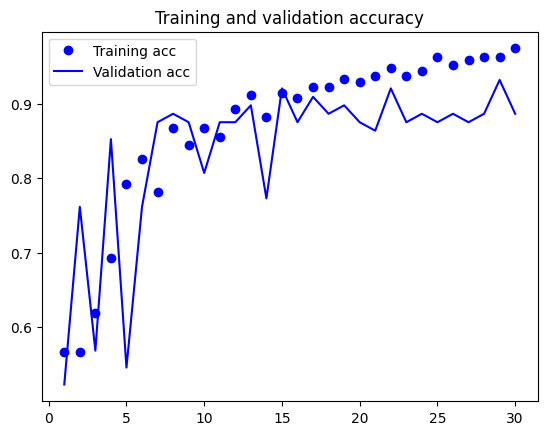

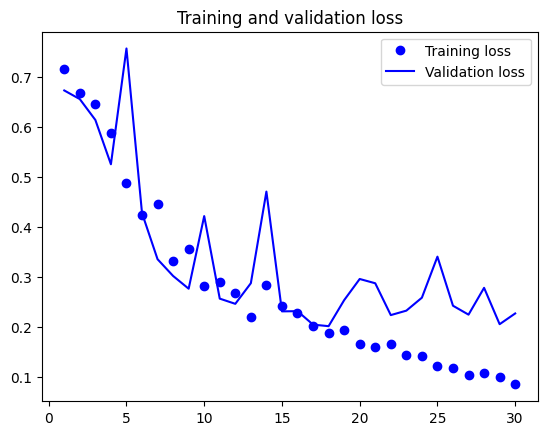

In [ ]:
# Plotting the results
plot_training_history(history)


In [ ]:
if __name__ == "__main__":
    checkpoint_folder = "/content/models"

    # Load your pre-built model here
    model = load_model('/content/lung_cancer_simple.h5')  # Replace with the path to your model

    # Replace these with your actual test and validation generators
    test_generator = test_generator
    validation_generator = validation_generator

    results_df = evaluate_checkpoints(checkpoint_folder, model, test_generator, validation_generator)
    results_df


In [ ]:
results_df.sort_values(by="Checkpoint", ascending=True)


,Checkpoint,Validation Loss,Validation Accuracy,Test Loss,Test Accuracy
21,cp-0001.ckpt.index,0.672603,0.522727,0.673417,0.522727
20,cp-0002.ckpt.index,0.655330,0.761364,0.653903,0.784091
24,cp-0003.ckpt.index,0.613650,0.568182,0.615522,0.568182
1,cp-0004.ckpt.index,0.525118,0.852273,0.528103,0.806818
29,cp-0005.ckpt.index,0.756492,0.545455,0.792752,0.522727
16,cp-0006.ckpt.index,0.427563,0.761364,0.459467,0.761364
12,cp-0007.ckpt.index,0.335355,0.875000,0.362609,0.818182
27,cp-0008.ckpt.index,0.301913,0.886364,0.331994,0.863636
10,cp-0009.ckpt.index,0.276450,0.875000,0.326721,0.863636
5,cp-0010.ckpt.index,0.421569,0.806818,0.476507,0.818182


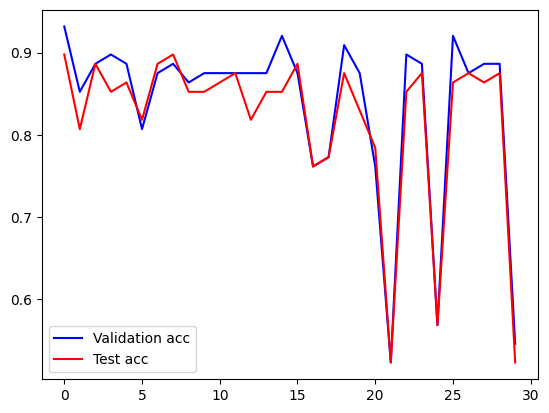

In [ ]:
plot_validation_and_test_accuracy(results_df)


In [ ]:
# Loading the best set of weights
best = '/content/models/cp-0029.ckpt'
model.load_weights(best)


In [ ]:
# Testing the model on Test Data
test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)


6/6 [==============================] - 1s 117ms/step - loss: 0.2810 - acc: 0.8977
test acc: 0.8977272510528564


### Classification Report

#### Undersampling the positive images test split

In [29]:
source_folder       =  '/content/lung cancer dataset/test/positive'
destination_folder  =  '/content/lung cancer dataset/temporary'
num_files_to_move   =  4  # Change this to the desired number of files to move

move_files(source_folder, destination_folder, num_files_to_move)



Moved: positive1.jpeg
Moved: positive10.jpeg
Moved: positive106.jpeg
Moved: positive11.jpeg


In [ ]:
# New test generator
# from sklearn.metrics import classification_report

test_generator       = gen.flow_from_directory(
                                                '/content/lung cancer dataset/test',
                                                target_size      =  (200, 200),
                                                batch_size       =  84,
                                                class_mode       =  'binary')

batch, true_labels         =  next(test_generator)
predicted_probabilities    =  model.predict(batch)
predicted_labels = (predicted_probabilities > 0.5).astype(int).reshape(84,1)

# Generating the classification report
report = classification_report(true_labels, predicted_labels)

print(report)


Found 84 images belonging to 2 classes.
3/3 [==============================] - 0s 14ms/step
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91        42
         1.0       0.93      0.88      0.90        42

    accuracy                           0.90        84
   macro avg       0.91      0.90      0.90        84
weighted avg       0.91      0.90      0.90        84



#### Confusion Matrix
https://www.youtube.com/watch?v=AOIkPnKu0YA


In [ ]:
# from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)


In [ ]:
print(conf_matrix.shape)


(2, 2)


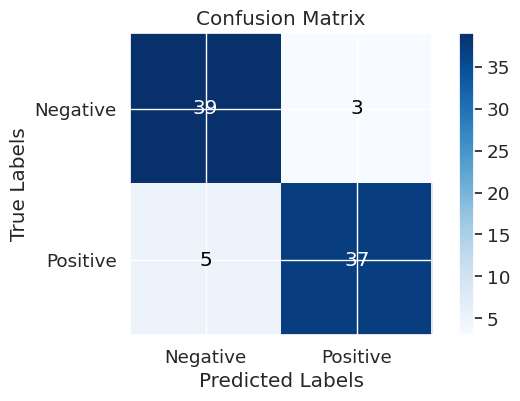

In [ ]:
plot_confusion_matrix(conf_matrix, class_labels)


In [ ]:
conf_matrix


array([[39,  3],
       [ 5, 37]])

In [ ]:
# from sklearn.metrics import confusion_matrix

# # Example true labels and predicted labels (replace with your actual data)
# true_labels      = [1, 0, 1, 1, 0, 0, 1, 0, 1, 1]
# predicted_labels = [1, 0, 0, 1, 0, 1, 1, 0, 1, 0]

# # Calculate the confusion matrix
# conf_matrix = confusion_matrix(true_labels, predicted_labels)

# # Print the confusion matrix
# print("Confusion Matrix:")
# print(conf_matrix)


Confusion Matrix:
[[3 1]
 [2 4]]


# With Data Augmentation

In [ ]:
# I have manually done undersampling on positive training images, to nullify class imbalance
# I have moved first 14 (positive1, 2, 3 , ..14) images to a temporay folder 'lung cancer dataset/ tempporary for positive train....'


In [ ]:
print('total training +ive images:'              , len(os.listdir(r'D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\lung cancer dataset\train\positive')))
print('total training -ive images:'              , len(os.listdir(r'D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\lung cancer dataset\train\negative')))
print('\n')

print('total validation +ive images:'            , len(os.listdir(r'D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\lung cancer dataset\validation\positive')))
print('total validation -ive images:'            , len(os.listdir(r'D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\lung cancer dataset\validation\negative')))
print('\n')

print('total test +ive images:'                  , len(os.listdir(r'D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\lung cancer dataset\test\positive')))
print('total test -ive images:'                  , len(os.listdir(r'D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\lung cancer dataset\test\negative')))


total training +ive images: 128
total training -ive images: 128


total validation +ive images: 46
total validation -ive images: 42


total test +ive images: 42
total test -ive images: 42


In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# ImageDataGenerator: specially designed for image data

train_dir       =  r'D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\lung cancer dataset\train'
validation_dir  =  r'D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\lung cancer dataset\validation'
test_dir        =  r'D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\lung cancer dataset\test'


train_datagen = ImageDataGenerator(
                    rescale             =  1./255,
                    rotation_range      =  10,
                    width_shift_range   =  0.1,
                    height_shift_range  =  0.1,
                    shear_range         =  0.1,
                    zoom_range          =  0.1,
                    horizontal_flip     =  True,)



test_datagen   = ImageDataGenerator(rescale = 1./255) # Validation data ko augment nahi kr rahay


train_generator      = train_datagen.flow_from_directory(
                        train_dir,
                        target_size  =  (200, 200),
                        batch_size   =  15,
                        class_mode   =  'binary')

validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size  =  (200, 200),
                        batch_size   =  15,
                        class_mode   =  'binary')

test_generator       = test_datagen.flow_from_directory(
                        test_dir,
                        target_size  =  (200, 200),
                        batch_size   =  15,
                        class_mode   =  'binary')


Found 256 images belonging to 2 classes.
Found 88 images belonging to 2 classes.
Found 84 images belonging to 2 classes.


In [ ]:
# from tensorflow.keras import layers
# from tensorflow.keras import models

model = models.Sequential()

# Convolutional Base
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Classifier Base
model.add(layers.Flatten())
#model.add(layers.Dropout(0.1)) # Dropout layer lga di
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(loss       =  'binary_crossentropy',
              optimizer  =  optimizer,
              metrics    =  ['acc'])


Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_108 (Conv2D)         (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_108 (MaxPooli  (None, 99, 99, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_109 (Conv2D)         (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_109 (MaxPooli  (None, 48, 48, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_110 (Conv2D)         (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_110 (MaxPooli  (None, 23, 23, 128)    

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import callbacks

# The sets-of-weights at d/f epochs will have d/f names
checkpoint_path = r'D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\data_augmentation_cps\cp-{epoch:04d}.ckpt'

# converting it into a directory
checkpoint_dir  = os.path.dirname(checkpoint_path)

cp_callback = callbacks.ModelCheckpoint(checkpoint_path, verbose = 1, save_weights_only = True)

# For details and much more, see this official video from tensorflow
# https://www.youtube.com/watch?v=HxtBIwfy0kM


In [ ]:
history = model.fit(train_generator,
                    epochs            =  30,
                    validation_data   =  validation_generator,
                    callbacks         =  cp_callback
                  )


Epoch 1/30
18/18 [==============================] - ETA: 0s - loss: 0.7290 - acc: 0.4922
Epoch 1: saving model to D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\data_augmentation_cps\cp-0001.ckpt
18/18 [==============================] - 5s 259ms/step - loss: 0.7290 - acc: 0.4922 - val_loss: 0.6944 - val_acc: 0.4773
Epoch 2/30
18/18 [==============================] - ETA: 0s - loss: 0.6899 - acc: 0.5352
Epoch 2: saving model to D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\data_augmentation_cps\cp-0002.ckpt
18/18 [==============================] - 5s 256ms/step - loss: 0.6899 - acc: 0.5352 - val_loss: 0.7034 - val_acc: 0.4886
Epoch 3/30
18/18 [==============================] - ETA: 0s - loss: 0.6402 - acc: 0.5977
Epoch 3: saving model to D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\data_augmentation_cps\cp-0003.ckpt

In [ ]:
model.save('lung_cancer_simple_augmented.h5')


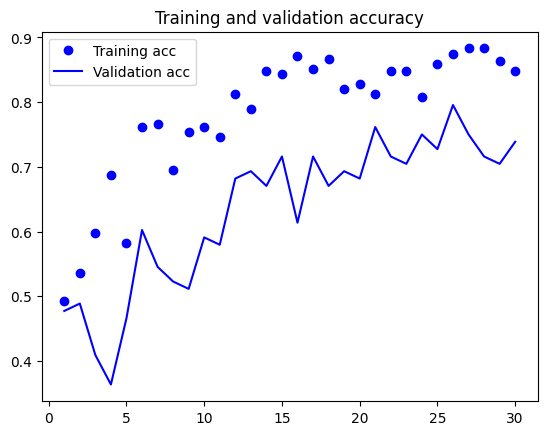

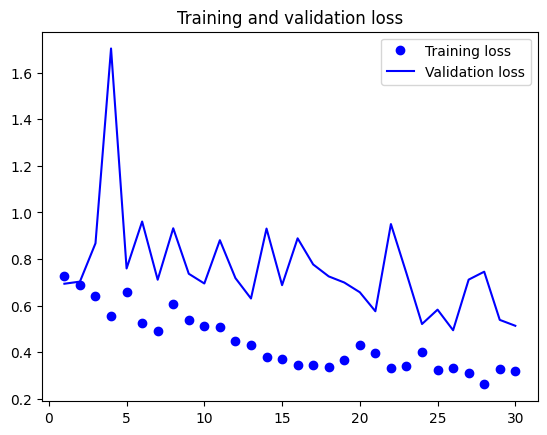

In [ ]:
plot_training_history(history)


In [ ]:
if __name__ == "__main__":
    checkpoint_folder = r"D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\data_augmentation_cps"

    # Load your pre-built model here
    model = load_model('lung_cancer_simple_augmented.h5')  # Replace with the path to your model


    test_generator       = test_generator
    validation_generator = validation_generator

    results_df = evaluate_checkpoints(checkpoint_folder, model, test_generator, validation_generator)
    results_df


In [ ]:
results_df.sort_values(by="Checkpoint", ascending=True)


,Checkpoint,Validation Loss,Validation Accuracy,Test Loss,Test Accuracy
0,cp-0001.ckpt.index,0.694356,0.477273,0.692748,0.500000
1,cp-0002.ckpt.index,0.703404,0.488636,0.677289,0.547619
2,cp-0003.ckpt.index,0.867911,0.409091,0.922870,0.392857
3,cp-0004.ckpt.index,1.703824,0.363636,2.243825,0.392857
4,cp-0005.ckpt.index,0.759822,0.465909,0.759036,0.488095
5,cp-0006.ckpt.index,0.961246,0.602273,0.487150,0.714286
6,cp-0007.ckpt.index,0.711521,0.545455,0.673181,0.571429
7,cp-0008.ckpt.index,0.932315,0.522727,0.828691,0.547619
8,cp-0009.ckpt.index,0.737138,0.511364,0.662675,0.535714
9,cp-0010.ckpt.index,0.695346,0.590909,0.556453,0.690476


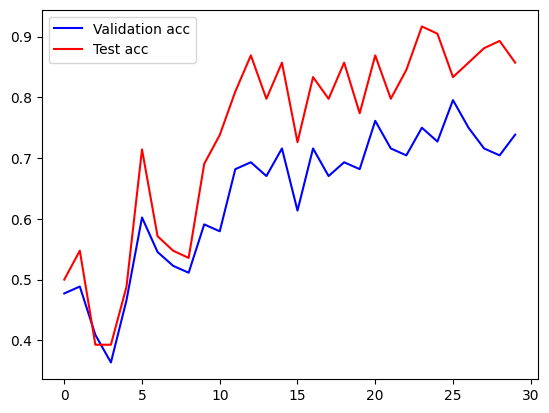

In [ ]:
plot_validation_and_test_accuracy(results_df)


In [ ]:
# Loading the best set of weights
best = r'D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\data_augmentation_cps\cp-0021.ckpt'
model.load_weights(best)


In [ ]:
# Testing the model on Test Data
test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)


1/1 [==============================] - 1s 787ms/step - loss: 0.3578 - acc: 0.8690
test acc: 0.8690476417541504


We choose the 21st checkpoint because the overfitting is likely to be less in it.

The confusion matrices produced by this checkpoint are better than all of the other checkpoints.


### Classification Report


#### Undersampling the positive images test split

this time I did it without using code (because I am now running the notebok on pc)

moved positive189,190,191,192 from test/positive folder to the 'lung cancer dataset/temporary folder'


In [ ]:
# New test generator
# from sklearn.metrics import classification_report
test_generator       = test_datagen.flow_from_directory(
                                                r'D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\lung cancer dataset\test',
                                                target_size      =  (200, 200),
#                                                batch_size       =  88,
                                                batch_size       =  84,
                                                class_mode       =  'binary')

batch, true_labels         =  next(test_generator)
predicted_probabilities    =  model.predict(batch)
#predicted_labels = (predicted_probabilities > 0.5).astype(int).reshape(88,1)
predicted_labels = (predicted_probabilities > 0.5).astype(int).reshape(84,1)


# Generating the classification report
report = classification_report(true_labels, predicted_labels)

print(report)


Found 84 images belonging to 2 classes.
3/3 [==============================] - 0s 126ms/step
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87        42
         1.0       0.86      0.88      0.87        42

    accuracy                           0.87        84
   macro avg       0.87      0.87      0.87        84
weighted avg       0.87      0.87      0.87        84



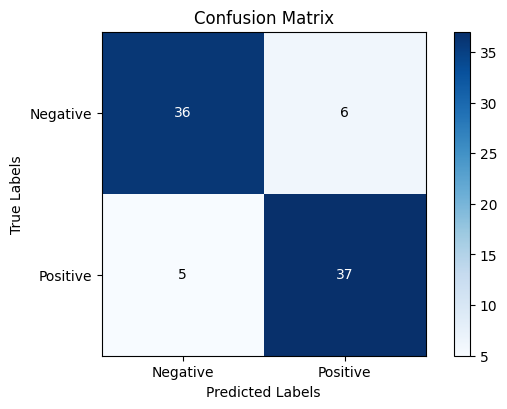

In [ ]:
# from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(true_labels, predicted_labels)
plot_confusion_matrix(conf_matrix, class_labels)


# Functional API Format

In [ ]:
# from tensorflow.keras import Input
# from tensorflow.keras import Model


inputs = Input(shape=(200, 200, 3))

x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Flatten()(x)
#x = layers.Dropout(0.1)(x)
x = layers.Dense(512, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

model.summary()

optimizer = optimizers.Adam(learning_rate=0.0007)
model.compile(loss       =  'binary_crossentropy',
              optimizer  =  optimizer,
              metrics    =  ['acc'])


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d_24 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 46, 46, 128)       7385

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import callbacks

# The sets-of-weights at d/f epochs will have d/f names
checkpoint_path = r'D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\functional_api_cps\cp-{epoch:04d}.ckpt'

# converting it into a directory
checkpoint_dir  = os.path.dirname(checkpoint_path)

cp_callback = callbacks.ModelCheckpoint(checkpoint_path, verbose = 1, save_weights_only = True)

# For details and much more, see this official video from tensorflow
# https://www.youtube.com/watch?v=HxtBIwfy0kM


In [ ]:
history = model.fit(train_generator,
                    epochs            =  30,
                    validation_data   =  validation_generator,
                    callbacks         =  cp_callback
                  )


Epoch 1/30
18/18 [==============================] - ETA: 0s - loss: 0.7283 - acc: 0.5195
Epoch 1: saving model to D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\functional_api_cps\cp-0001.ckpt
18/18 [==============================] - 14s 715ms/step - loss: 0.7283 - acc: 0.5195 - val_loss: 0.6894 - val_acc: 0.5227
Epoch 2/30
18/18 [==============================] - ETA: 0s - loss: 0.6804 - acc: 0.5781
Epoch 2: saving model to D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\functional_api_cps\cp-0002.ckpt
18/18 [==============================] - 12s 681ms/step - loss: 0.6804 - acc: 0.5781 - val_loss: 0.6821 - val_acc: 0.5455
Epoch 3/30
18/18 [==============================] - ETA: 0s - loss: 0.6500 - acc: 0.6289
Epoch 3: saving model to D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\functional_api_cps\cp-0003.ckpt
18/18 

In [ ]:
#D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\functional_api_cps\cp-0023.ckpt
model.save('lung_cancer_simple_functional.h5')



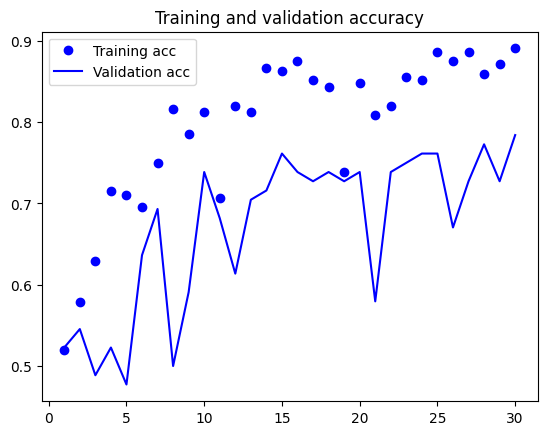

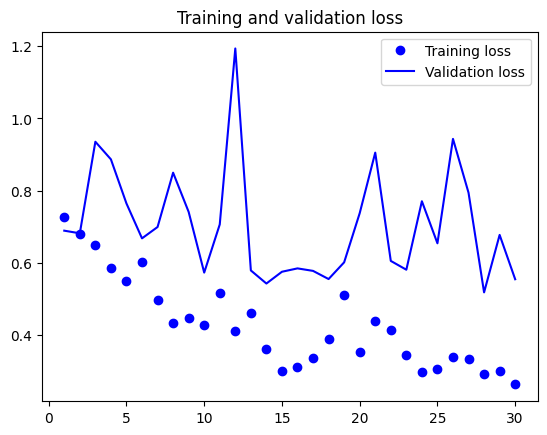

In [ ]:
plot_training_history(history)


In [ ]:
if __name__ == "__main__":
    checkpoint_folder = r"D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\functional_api_cps"

    # Load your pre-built model here
    model = load_model('lung_cancer_simple_functional.h5')  # Replace with the path to your model


    test_generator       = test_generator
    validation_generator = validation_generator

    results_df = evaluate_checkpoints(checkpoint_folder, model, test_generator, validation_generator)
    results_df


In [ ]:
results_df.sort_values(by="Checkpoint", ascending=True)


,Checkpoint,Validation Loss,Validation Accuracy,Test Loss,Test Accuracy
0,cp-0001.ckpt.index,0.689416,0.522727,0.689789,0.500000
1,cp-0002.ckpt.index,0.682102,0.545455,0.633924,0.690476
2,cp-0003.ckpt.index,0.935643,0.488636,0.950274,0.523810
3,cp-0004.ckpt.index,0.886887,0.522727,0.771071,0.654762
4,cp-0005.ckpt.index,0.764703,0.477273,0.768551,0.559524
5,cp-0006.ckpt.index,0.668148,0.636364,0.623778,0.654762
6,cp-0007.ckpt.index,0.699572,0.693182,0.425439,0.809524
7,cp-0008.ckpt.index,0.849967,0.500000,0.656240,0.595238
8,cp-0009.ckpt.index,0.741363,0.590909,0.493262,0.702381
9,cp-0010.ckpt.index,0.573344,0.738636,0.373876,0.869048


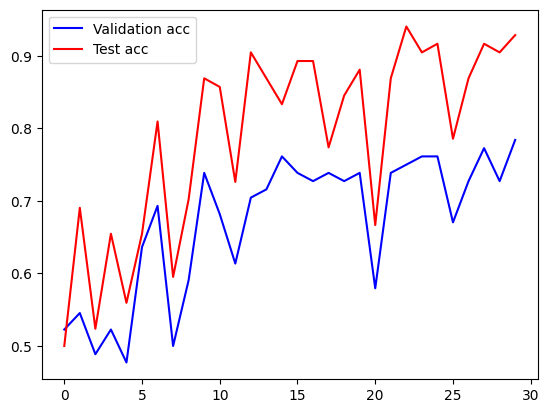

In [ ]:
plot_validation_and_test_accuracy(results_df)


In [ ]:
# Loading the best set of weights
best = r'D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\functional_api_cps\cp-0030.ckpt'
model.load_weights(best)


In [ ]:
# Testing the model on Test Data
test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)


1/1 [==============================] - 2s 2s/step - loss: 0.1883 - acc: 0.9286
test acc: 0.9285714030265808


In [ ]:
# New test generator
# from sklearn.metrics import classification_report
test_generator       = test_datagen.flow_from_directory(
                                                r'D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\lung cancer dataset\test',
                                                target_size      =  (200, 200),
#                                                batch_size       =  88,
                                                batch_size       =  84,
                                                class_mode       =  'binary')

batch, true_labels         =  next(test_generator)
predicted_probabilities    =  model.predict(batch)
#predicted_labels = (predicted_probabilities > 0.5).astype(int).reshape(88,1)
predicted_labels = (predicted_probabilities > 0.5).astype(int).reshape(84,1)

# Generating the classification report
report = classification_report(true_labels, predicted_labels)

print(report)


Found 84 images belonging to 2 classes.
3/3 [==============================] - 0s 98ms/step
              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92        42
         1.0       0.88      1.00      0.93        42

    accuracy                           0.93        84
   macro avg       0.94      0.93      0.93        84
weighted avg       0.94      0.93      0.93        84



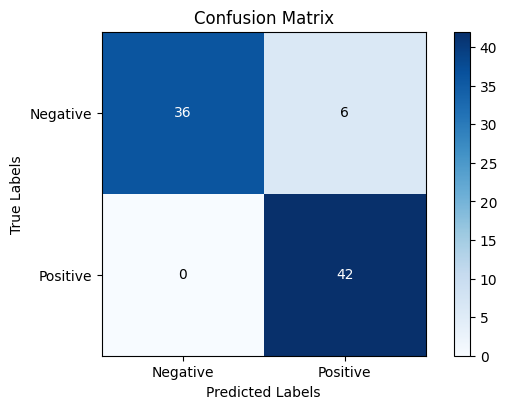

In [ ]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plot_confusion_matrix(conf_matrix, class_labels)


# Feautre Extraction with Data Augmentation


In [ ]:
# from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
# from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
# from tensorflow.keras.models import Model
# from tensorflow.keras import regularizers

input_shape = (192, 192, 3)
input_layer = Input(shape=(192, 192, 3))

mobilenet_base = MobileNetV2(weights='imagenet',
                             input_shape=input_shape,
                             include_top=False)

model_mobilenet  = mobilenet_base(input_layer)
output_mobilenet = Flatten()(model_mobilenet)

x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.4))(output_mobilenet)
#x = Dropout(0.5)(x)  # Add Dropout layer with a dropout rate of 0.5
outputs = Dense(1, activation='sigmoid')(x)

model   = Model(inputs=input_layer, outputs=outputs)

model.summary()

optimizer = optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])


Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_35 (InputLayer)       [(None, 192, 192, 3)]     0         
                                                                 
 mobilenetv2_1.00_192 (Funct  (None, 6, 6, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_16 (Flatten)        (None, 46080)             0         
                                                                 
 dense_29 (Dense)            (None, 256)               11796736  
                                                                 
 dense_30 (Dense)            (None, 1)                 257       
                                                                 
Total params: 14,054,977
Trainable params: 14,020,865
Non-trainable params: 34,112
_________________________________________

In [ ]:
 # Freezing the Conv base
mobilenet_base.trainable = False


In [ ]:
model.summary()


Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_35 (InputLayer)       [(None, 192, 192, 3)]     0         
                                                                 
 mobilenetv2_1.00_192 (Funct  (None, 6, 6, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_16 (Flatten)        (None, 46080)             0         
                                                                 
 dense_29 (Dense)            (None, 256)               11796736  
                                                                 
 dense_30 (Dense)            (None, 1)                 257       
                                                                 
Total params: 14,054,977
Trainable params: 11,796,993
Non-trainable params: 2,257,984
______________________________________

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# ImageDataGenerator: specially designed for image data

train_dir       =  r'D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\lung cancer dataset\train'
validation_dir  =  r'D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\lung cancer dataset\validation'
test_dir        =  r'D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\lung cancer dataset\test'


train_datagen = ImageDataGenerator(
                    rescale             =  1./255,
                    rotation_range      =  10,
                    width_shift_range   =  0.1,
                    height_shift_range  =  0.1,
                    shear_range         =  0.1,
                    zoom_range          =  0.1,
                    horizontal_flip     =  True,)



test_datagen   = ImageDataGenerator(rescale = 1./255) # Validation data ko augment nahi kr rahay


train_generator      = train_datagen.flow_from_directory(
                        train_dir,
                        target_size  =  (192, 192),
                        batch_size   =  10,
                        class_mode   =  'binary')

validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size  =  (192, 192),
                        batch_size   =  10,
                        class_mode   =  'binary')

test_generator       = test_datagen.flow_from_directory(
                        test_dir,
                        target_size  =  (192, 192),
                        batch_size   =  10,
                        class_mode   =  'binary')


Found 256 images belonging to 2 classes.
Found 88 images belonging to 2 classes.
Found 84 images belonging to 2 classes.


In [ ]:
# import tensorflow as tf
# from tensorflow.keras import callbacks

# The sets-of-weights at d/f epochs will have d/f names
checkpoint_path = r'D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\feauture_ext_cps\cp-{epoch:04d}.ckpt'

# converting it into a directory
checkpoint_dir  = os.path.dirname(checkpoint_path)

cp_callback = callbacks.ModelCheckpoint(checkpoint_path, verbose = 1, save_weights_only = True)

# For details and much more, see this official video from tensorflow
# https://www.youtube.com/watch?v=HxtBIwfy0kM


In [ ]:
history = model.fit(train_generator,
                    epochs            =  30,
                    validation_data   =  validation_generator,
                    callbacks         =  cp_callback
                  )


Epoch 1/30
26/26 [==============================] - ETA: 0s - loss: 165.6137 - acc: 0.7734
Epoch 1: saving model to D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\feauture_ext_cps\cp-0001.ckpt
26/26 [==============================] - 26s 613ms/step - loss: 165.6137 - acc: 0.7734 - val_loss: 127.3056 - val_acc: 0.6705
Epoch 2/30
26/26 [==============================] - ETA: 0s - loss: 99.3918 - acc: 0.8906 
Epoch 2: saving model to D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\feauture_ext_cps\cp-0002.ckpt
26/26 [==============================] - 15s 565ms/step - loss: 99.3918 - acc: 0.8906 - val_loss: 75.1606 - val_acc: 0.5568
Epoch 3/30
26/26 [==============================] - ETA: 0s - loss: 58.2312 - acc: 0.9336
Epoch 3: saving model to D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\feauture_ext_cps\cp-0003.ckpt
2

In [ ]:
#D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\functional_api_cps\cp-0023.ckpt
model.save('lung_cancer_feature_ext.h5')


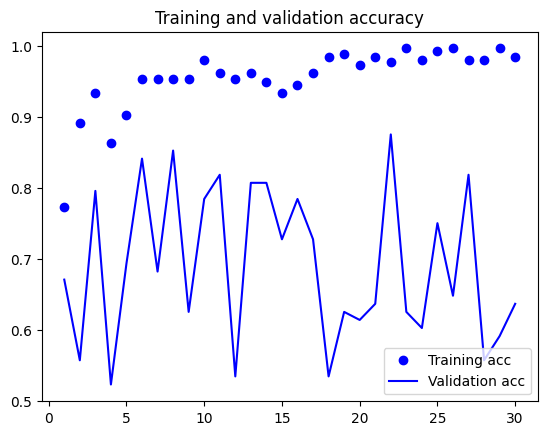

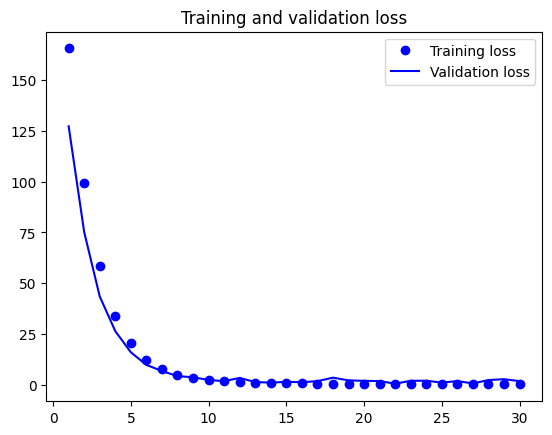

In [ ]:
plot_training_history(history)


In [ ]:

if __name__ == "__main__":
    checkpoint_folder = r"D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\feauture_ext_cps"

    # Load your pre-built model here
    model = load_model('lung_cancer_feature_ext.h5')  # Replace with the path to your model


    test_generator       = test_generator
    validation_generator = validation_generator

    results_df = evaluate_checkpoints(checkpoint_folder, model, test_generator, validation_generator)
    results_df

# WARNING:tensorflow:Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer


In [ ]:
results_df.sort_values(by="Checkpoint", ascending=True)


,Checkpoint,Validation Loss,Validation Accuracy,Test Loss,Test Accuracy
0,cp-0001.ckpt.index,127.305595,0.670455,127.191734,0.738095
1,cp-0002.ckpt.index,75.160553,0.556818,75.206146,0.535714
2,cp-0003.ckpt.index,43.458321,0.795455,43.377438,0.833333
3,cp-0004.ckpt.index,26.377338,0.522727,26.354807,0.511905
4,cp-0005.ckpt.index,15.969169,0.693182,15.636672,0.845238
5,cp-0006.ckpt.index,9.761181,0.840909,9.649519,0.892857
6,cp-0007.ckpt.index,6.752141,0.681818,6.327996,0.797619
7,cp-0008.ckpt.index,4.218002,0.852273,4.253239,0.785714
8,cp-0009.ckpt.index,3.671827,0.625000,3.340106,0.678571
9,cp-0010.ckpt.index,2.340848,0.784091,2.133966,0.809524


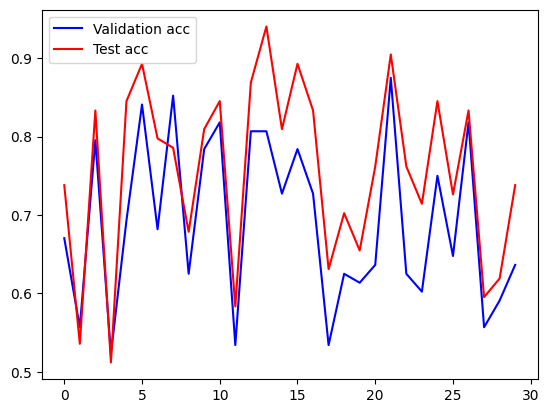

In [ ]:
plot_validation_and_test_accuracy(results_df)


In [ ]:
# Loading the best set of weights
best = r'D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\feauture_ext_cps\cp-0022.ckpt'
model.load_weights(best)




In [ ]:
# Testing the model on Test Data
test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)


1/1 [==============================] - 2s 2s/step - loss: 0.3925 - acc: 0.9048
test acc: 0.9047619104385376


In [ ]:
# New test generator
# from sklearn.metrics import classification_report
test_generator       = test_datagen.flow_from_directory(
                                                r'D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\lung cancer dataset\test',
                                                target_size      =  (192, 192),
#                                                batch_size       =  88,
                                                batch_size       =  84,
                                                class_mode       =  'binary')

batch, true_labels         =  next(test_generator)
predicted_probabilities    =  model.predict(batch)
#predicted_labels = (predicted_probabilities > 0.5).astype(int).reshape(88,1)
predicted_labels = (predicted_probabilities > 0.5).astype(int).reshape(84,1)

# Generating the classification report
report = classification_report(true_labels, predicted_labels)

print(report)


Found 84 images belonging to 2 classes.
3/3 [==============================] - 2s 145ms/step
              precision    recall  f1-score   support

         0.0       0.97      0.83      0.90        42
         1.0       0.85      0.98      0.91        42

    accuracy                           0.90        84
   macro avg       0.91      0.90      0.90        84
weighted avg       0.91      0.90      0.90        84



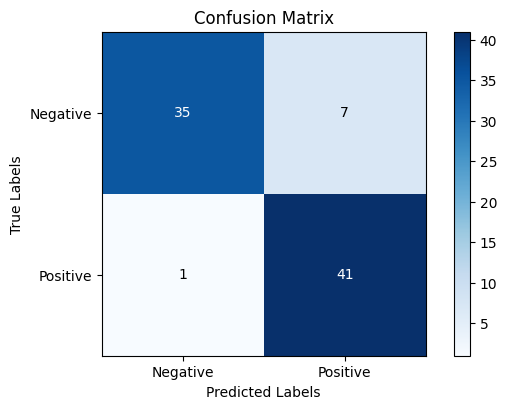

In [ ]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plot_confusion_matrix(conf_matrix, class_labels)


We see that this model:
As opposed to last model, this model works far better on validation data as well.

# Fine Tuning

In [ ]:
# from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
# from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
# from tensorflow.keras.models import Model
# from tensorflow.keras import regularizers

input_shape = (192, 192, 3)
input_layer = Input(shape=(192, 192, 3))

mobilenet_base = MobileNetV2(weights='imagenet',
                             input_shape=input_shape,
                             include_top=False)

model_mobilenet  = mobilenet_base(input_layer)
output_mobilenet = Flatten()(model_mobilenet)

x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.4))(output_mobilenet)
#x = Dropout(0.5)(x)  # Add Dropout layer with a dropout rate of 0.5
outputs = Dense(1, activation='sigmoid')(x)

model   = Model(inputs=input_layer, outputs=outputs)

model.summary()

optimizer = optimizers.Adam(learning_rate=0.00005)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])


Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_57 (InputLayer)       [(None, 192, 192, 3)]     0         
                                                                 
 mobilenetv2_1.00_192 (Funct  (None, 6, 6, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_27 (Flatten)        (None, 46080)             0         
                                                                 
 dense_51 (Dense)            (None, 256)               11796736  
                                                                 
 dense_52 (Dense)            (None, 1)                 257       
                                                                 
Total params: 14,054,977
Trainable params: 14,020,865
Non-trainable params: 34,112
_________________________________________

In [ ]:
mobilenet_base.summary()


Model: "mobilenetv2_1.00_192"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_58 (InputLayer)          [(None, 192, 192, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 96, 96, 32)   864         ['input_58[0][0]']               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 96, 96, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 96, 96, 32)   0           ['bn_Conv1[0][

### Freezing all layers up to a specific one

In [ ]:
mobilenet_base.trainable = True

set_trainable = False

for layer in mobilenet_base.layers:
  if layer.name == 'block_6_depthwise':
    set_trainable   = True

  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False


In [ ]:
model.summary()


Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_57 (InputLayer)       [(None, 192, 192, 3)]     0         
                                                                 
 mobilenetv2_1.00_192 (Funct  (None, 6, 6, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_27 (Flatten)        (None, 46080)             0         
                                                                 
 dense_51 (Dense)            (None, 256)               11796736  
                                                                 
 dense_52 (Dense)            (None, 1)                 257       
                                                                 
Total params: 14,054,977
Trainable params: 13,958,849
Non-trainable params: 96,128
_________________________________________

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# ImageDataGenerator: specially designed for image data

train_dir       =  r'D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\lung cancer dataset\train'
validation_dir  =  r'D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\lung cancer dataset\validation'
test_dir        =  r'D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\lung cancer dataset\test'


train_datagen = ImageDataGenerator(
                    rescale             =  1./255,
                    rotation_range      =  10,
                    width_shift_range   =  0.1,
                    height_shift_range  =  0.1,
                    shear_range         =  0.1,
                    zoom_range          =  0.1,
                    horizontal_flip     =  True,)



test_datagen   = ImageDataGenerator(rescale = 1./255) # Validation data ko augment nahi kr rahay


train_generator      = train_datagen.flow_from_directory(
                        train_dir,
                        target_size  =  (192, 192),
                        batch_size   =  10,
                        class_mode   =  'binary')

validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size  =  (192, 192),
                        batch_size   =  10,
                        class_mode   =  'binary')

test_generator       = test_datagen.flow_from_directory(
                        test_dir,
                        target_size  =  (192, 192),
                        batch_size   =  10,
                        class_mode   =  'binary')


Found 256 images belonging to 2 classes.
Found 88 images belonging to 2 classes.
Found 84 images belonging to 2 classes.


In [ ]:
# import tensorflow as tf
# from tensorflow.keras import callbacks

# The sets-of-weights at d/f epochs will have d/f names
checkpoint_path = r'D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\fine_tune_cps\cp-{epoch:04d}.ckpt'

# converting it into a directory
checkpoint_dir  = os.path.dirname(checkpoint_path)

cp_callback = callbacks.ModelCheckpoint(checkpoint_path, verbose = 1, save_weights_only = True)

# For details and much more, see this official video from tensorflow
# https://www.youtube.com/watch?v=HxtBIwfy0kM


In [ ]:
history = model.fit(train_generator,
                    epochs            =  30,
                    validation_data   =  validation_generator,
                    callbacks         =  cp_callback
                  )


Epoch 1/30
26/26 [==============================] - ETA: 0s - loss: 182.7117 - acc: 0.7969
Epoch 1: saving model to D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\fine_tune_cps\cp-0001.ckpt
26/26 [==============================] - 26s 625ms/step - loss: 182.7117 - acc: 0.7969 - val_loss: 160.0423 - val_acc: 0.7841
Epoch 2/30
26/26 [==============================] - ETA: 0s - loss: 141.9986 - acc: 0.8633
Epoch 2: saving model to D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\fine_tune_cps\cp-0002.ckpt
26/26 [==============================] - 14s 551ms/step - loss: 141.9986 - acc: 0.8633 - val_loss: 124.5375 - val_acc: 0.7841
Epoch 3/30
26/26 [==============================] - ETA: 0s - loss: 109.9536 - acc: 0.9453
Epoch 3: saving model to D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\fine_tune_cps\cp-0003.ckpt
26/26 [

In [ ]:
#D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\functional_api_cps\cp-0023.ckpt
model.save('lung_cancer_fine_tune.h5')


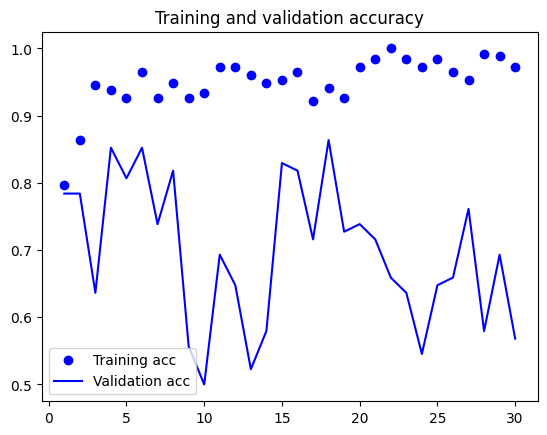

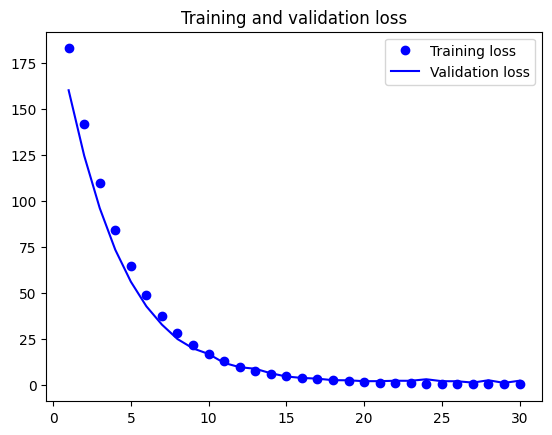

In [ ]:
plot_training_history(history)


In [ ]:

if __name__ == "__main__":
    checkpoint_folder = r"D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\fine_tune_cps"

    # Load your pre-built model here
    model = load_model('lung_cancer_fine_tune.h5')  # Replace with the path to your model


    test_generator       = test_generator
    validation_generator = validation_generator

    results_df = evaluate_checkpoints(checkpoint_folder, model, test_generator, validation_generator)
    results_df

# WARNING:tensorflow:Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer


In [ ]:
results_df.sort_values(by="Checkpoint", ascending=True)


,Checkpoint,Validation Loss,Validation Accuracy,Test Loss,Test Accuracy
0,cp-0001.ckpt.index,160.042297,0.784091,160.036987,0.821429
1,cp-0002.ckpt.index,124.537552,0.784091,124.634453,0.738095
2,cp-0003.ckpt.index,96.076172,0.636364,96.171478,0.619048
3,cp-0004.ckpt.index,73.478203,0.852273,73.479126,0.821429
4,cp-0005.ckpt.index,56.169712,0.806818,56.072365,0.845238
5,cp-0006.ckpt.index,42.790924,0.852273,42.725960,0.880952
6,cp-0007.ckpt.index,32.847824,0.738636,32.861450,0.761905
7,cp-0008.ckpt.index,25.032970,0.818182,24.994486,0.857143
8,cp-0009.ckpt.index,19.960030,0.556818,19.540844,0.702381
9,cp-0010.ckpt.index,16.930820,0.500000,16.439260,0.511905


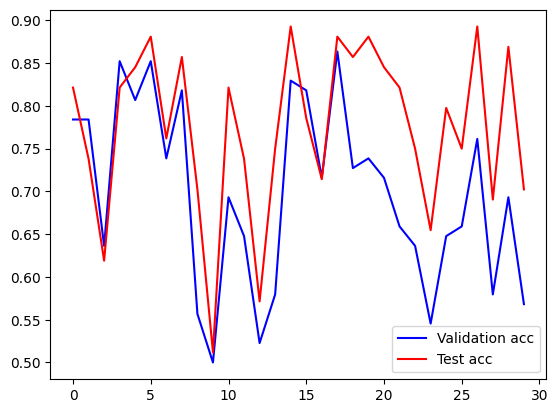

In [ ]:
plot_validation_and_test_accuracy(results_df)


In [ ]:
# Loading the best set of weights
model = load_model('lung_cancer_fine_tune.h5')
best = r'D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\fine_tune_cps\cp-0018.ckpt'
model.load_weights(best)


In [ ]:
# Testing the model on Test Data
test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)




1/1 [==============================] - 3s 3s/step - loss: 2.7114 - acc: 0.8636
test acc: 0.8636363744735718


In [ ]:
# New test generator
# from sklearn.metrics import classification_report
test_generator       = test_datagen.flow_from_directory(
                                                r'D:\Career\Artificial Intelligence\PIAIC\Artificial Intelligence Engineering\Q3\Assignments\Lungs Cancer\lung cancer dataset\test',
                                                target_size      =  (192, 192),
#                                                batch_size       =  88,
                                                batch_size       =  84,
                                                class_mode       =  'binary')

batch, true_labels         =  next(test_generator)
predicted_probabilities    =  model.predict(batch)
#predicted_labels = (predicted_probabilities > 0.5).astype(int).reshape(88,1)
predicted_labels = (predicted_probabilities > 0.5).astype(int).reshape(84,1)

# Generating the classification report
report = classification_report(true_labels, predicted_labels)

print(report)


Found 84 images belonging to 2 classes.
3/3 [==============================] - 1s 165ms/step
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88        42
         1.0       0.88      0.88      0.88        42

    accuracy                           0.88        84
   macro avg       0.88      0.88      0.88        84
weighted avg       0.88      0.88      0.88        84



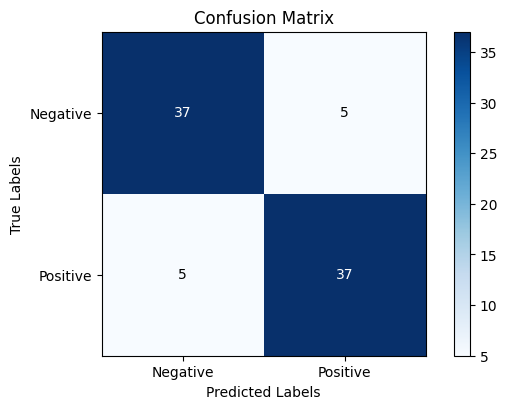

In [ ]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plot_confusion_matrix(conf_matrix, class_labels)


# Helper Functions

In [4]:
# import os
# import shutil

def empty_folder(folder_path):
    """
    Delete all files and folders inside a specified folder.

    Args:
        folder_path (str): The path to the folder to empty.
    """
    # Check if the folder exists
    if os.path.exists(folder_path):
        # Remove all files and folders in the folder
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            try:
                if os.path.isfile(file_path):
                    os.unlink(file_path)
                elif os.path.isdir(file_path):
                    shutil.rmtree(file_path)
            except Exception as e:
                print(f"Error deleting {file_path}: {e}")
    else:
        print(f"The folder {folder_path} does not exist.")

# # Example usage:
# folder_to_empty = '/content/Data'
# empty_folder(folder_to_empty)


In [5]:
# import shutil

def copy_zip_file(source_zip_file, destination_directory):
    """
    Copy a zip file from the source path to the destination directory.

    Args:
        source_zip_file (str): The path to the source zip file.
        destination_directory (str): The destination directory where the zip file will be copied.
    """
    try:
        shutil.copy(source_zip_file, destination_directory)
        print(f"Zip file '{source_zip_file}' copied to '{destination_directory}' successfully.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage:
# source_zip = '/content/drive/MyDrive/google colab/Data_simple_lung_cancer.zip'
# destination_dir = '/content'
# copy_zip_file(source_zip, destination_dir)


In [8]:
# import os
# import shutil

def transfer_images(source_folders, destination_folder):
    """
    Transfer all images from source_folders to the destination_folder.

    Args:
        source_folders (list): List of source folder paths.
        destination_folder (str): Destination folder path.

    Returns:
        None
    """
    for folder in source_folders:
        files = os.listdir(folder)
        for file in files:
            src = os.path.join(folder, file)
            shutil.move(src, destination_folder)

# Example usage:
# source_folders = ['/content/Data/negative', '/content/Data/positive']
# destination_folder = '/content/train/'

# transfer_images(source_folders, destination_folder)


In [13]:
#import os

def create_dataset_structure(base_dir, data_splits_names, class_names):
    """
    Create the directory structure for a dataset.

    Args:
        base_dir (str): Base directory where all operations will be performed.
        data_splits_names (list): List of names for data splits (e.g., ['train', 'validation', 'test']).
        class_names (list): List of class names (e.g., ['positive', 'negative']).

    Returns:
        List of strings containing the directory paths created.
    """
    # Create the base directory
    os.mkdir(base_dir)

    # Create data split directories
    data_split_paths = []
    for split_name in data_splits_names:
        split_path = os.path.join(base_dir, split_name)
        os.mkdir(split_path)
        data_split_paths.append(split_path)

    # Create class directories inside data split directories
    for split_path in data_split_paths:
        for class_name in class_names:
            os.mkdir(os.path.join(split_path, class_name))

    return data_split_paths

# Example usage:
# base_dir           =  '/content/lung_cancer_dataset'
# data_splits_names  =  ['train', 'validation', 'test']
# class_names        =  ['positive', 'negative']

# data_split_paths = create_dataset_structure(base_dir, data_splits_names, class_names)


In [18]:
# Generating the numbers, corresponding to quantities of images which will be transferred to train, validation and test splits,, for each class

def numbers_of_images_in_splits(total_images_per_class, train_percentage, validation_percentage, test_percentage):
    splits = {}

    for class_label, num_images in total_images_per_class.items():
        num_train = int(num_images * train_percentage)
        num_validation = int(num_images * validation_percentage)
        num_test = int(num_images * test_percentage)

        # Calculate any remaining images that were not assigned due to rounding
        remaining = num_images - (num_train + num_validation + num_test)

        # Distribute remaining images to the training set to minimize waste
        num_train += remaining

        splits[class_label] = {
            'train': num_train,
            'validation': num_validation,
            'test': num_test
        }

    return splits


In [20]:
# import os
# import shutil
# import random

def transfer_images_to_destinations(source_folder, class_to_destinations, split_results):
    """
    Transfer images from the source folder to specified destinations according to the class_to_destinations mapping.

    Args:
        source_folder (str): Path to the source folder containing the images.
        class_to_destinations (dict): A dictionary mapping class labels to destination directories.
        split_results (dict): A dictionary containing the number of images to transfer for each class and split.

    Returns:
        None
    """
    # A dictionary to keep track of transferred images
    transferred_images = {}

    # Iterating through each class and copying the specified number of unique images to the destinations
    for class_label, destinations in class_to_destinations.items():
        class_images = [img for img in os.listdir(source_folder) if class_label in img]

        for destination, num_images in destinations:
            if len(class_images) < num_images:
                print(f"Warning: Not enough images with class label '{class_label}' in the source folder for destination '{destination}'.")
                continue

            # Shuffle the images to select a random subset
            random.shuffle(class_images)

            # Create the destination directory if it doesn't exist
            if not os.path.exists(destination):
                os.makedirs(destination)

            # Copy the specified number of unique images to the destination
            transferred_images[class_label] = transferred_images.get(class_label, set())
            images_to_copy = [img for img in class_images if img not in transferred_images[class_label]][:num_images]

            for img_filename in images_to_copy:
                img_source_path = os.path.join(source_folder, img_filename)
                img_destination_path = os.path.join(destination, img_filename)
                shutil.copy(img_source_path, img_destination_path)
                transferred_images[class_label].add(img_filename)

            print(f"{len(images_to_copy)} images from class '{class_label}' copied to '{destination}'.")

# Example usage:
# source_folder = '/content/train'

# class_to_destinations = {
#     'positive': [
#         ('/content/lung cancer dataset/train/positive',       split_results['positive']['train']),
#         ('/content/lung cancer dataset/validation/positive',  split_results['positive']['validation']),
#         ('/content/lung cancer dataset/test/positive',        split_results['positive']['test']),
#     ],
#     'negative': [
#         ('/content/lung cancer dataset/train/negative',       split_results['negative']['train']),
#         ('/content/lung cancer dataset/validation/negative',  split_results['negative']['validation']),
#         ('/content/lung cancer dataset/test/negative',        split_results['negative']['test']),
#     ],
# }


# transfer_images_to_destinations(source_folder, class_to_destinations, split_results)


In [ ]:
# import shutil

def copy_folder_contents(source_folder, destination_folder):
    try:
        # Copy the entire folder and its contents recursively
        shutil.copytree(source_folder, destination_folder)
        print(f"Contents of '{source_folder}' copied to '{destination_folder}' successfully.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")


In [25]:
# import matplotlib.pyplot as plt

def plot_training_history(history):
    """
    Plot training and validation accuracy and loss from a Keras training history.

    Args:
        history (dict): A Keras training history containing 'acc', 'val_acc', 'loss', and 'val_loss' keys.

    Returns:
        None
    """
    acc = history['acc']
    val_acc = history['val_acc']
    loss = history['loss']
    val_loss = history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Plot training and validation accuracy
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    # Plot training and validation loss
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

# Example usage:
# history = {
#     'acc': [0.6, 0.7, 0.8, 0.9],
#     'val_acc': [0.5, 0.6, 0.7, 0.8],
#     'loss': [0.5, 0.4, 0.3, 0.2],
#     'val_loss': [0.6, 0.5, 0.4, 0.3]
# }


In [26]:
# import os
# import pandas as pd
# import tensorflow as tf
# from tensorflow.keras.models import load_model

def evaluate_checkpoints(checkpoint_folder, model, test_generator, validation_generator):
    checkpoint_files = [f for f in os.listdir(checkpoint_folder) if f.endswith('.ckpt.index')]

    results = []

    for checkpoint_file in checkpoint_files:
        checkpoint_prefix = os.path.join(checkpoint_folder, checkpoint_file[:-6])

        # Load the weights into the existing model
        model.load_weights(checkpoint_prefix)

        # Compile the model (if necessary)
        # model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        # Evaluate on the validation data (not test data)
        validation_loss, validation_accuracy = model.evaluate(validation_generator)

        # Evaluate on the test data
        test_loss, test_accuracy = model.evaluate(test_generator)

        results.append({
            'Checkpoint': checkpoint_file,
            'Validation Loss': validation_loss,
            'Validation Accuracy': validation_accuracy,
            'Test Loss': test_loss,
            'Test Accuracy': test_accuracy
        })

    # Create a DataFrame from the results
    results_df = pd.DataFrame(results)

    return results_df



In [27]:
import matplotlib.pyplot as plt

def plot_validation_and_test_accuracy(results_df):
    """
    Plot validation and test accuracy from a DataFrame.

    Args:
        results_df (DataFrame): A DataFrame containing 'Validation Accuracy' and 'Test Accuracy' columns.

    Returns:
        None
    """
    plt.plot(range(30), results_df['Validation Accuracy'], 'b', label='Validation acc')
    plt.plot(range(30), results_df['Test Accuracy'], 'r', label='Test acc')
    plt.legend()
    plt.show()

# Example usage:
# Assuming you have a DataFrame named results_df
# results_df = ...  # Your DataFrame with 'Validation Accuracy' and 'Test Accuracy' columns


In [28]:
# import os
# import shutil

def move_files(source_folder, destination_folder, num_files_to_move):
    # Create the destination folder if it doesn't exist
    os.makedirs(destination_folder, exist_ok=True)

    # List all files in the source folder and sort them alphabetically
    files = os.listdir(source_folder)
    files.sort()

    # Move the specified number of files to the destination folder
    for filename in files[:num_files_to_move]:
        source_path = os.path.join(source_folder, filename)
        destination_path = os.path.join(destination_folder, filename)
        shutil.move(source_path, destination_path)
        print(f"Moved: {filename}")


In [30]:
# import numpy as np
# import matplotlib.pyplot as plt

def plot_confusion_matrix(conf_matrix, class_labels):
    """
    Plot a confusion matrix heatmap.

    Args:
        conf_matrix (numpy.ndarray): A 2D numpy array representing the confusion matrix.
        class_labels (list): List of class labels.

    Returns:
        None
    """
    plt.figure(figsize=(6, 4))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    num_classes = len(class_labels)
    plt.xticks(np.arange(num_classes), class_labels)
    plt.yticks(np.arange(num_classes), class_labels)

    thresh = conf_matrix.max() / 2
    for i in range(num_classes):
        for j in range(num_classes):
            plt.text(j, i, format(conf_matrix[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if conf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

# # Example usage:
# # Replace 'conf_matrix' and 'class_labels' with your actual confusion matrix and class labels
# conf_matrix = np.array([[50, 10], [5, 85]])
# class_labels = ['Negative', 'Positive']

